In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
#get flights dataset
flights_data = pd.read_csv('dataset/FlightDelays.csv')

In [3]:
#converting the object type(String type) to categorical data
#substitute to adding dummy variables

from collections import defaultdict
d = defaultdict(LabelEncoder)

#selecting cols that need to be transformed
df = pd.DataFrame(flights_data, columns = ['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN','TAIL_NUM','Flight_Status'])

# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
flights_df=pd.DataFrame(df.apply(lambda x: d[x.name].transform(x)))

#add the rest of the cols to the dataframe
flights_df['CRS_DEP_TIME']=flights_data['CRS_DEP_TIME']
flights_df['DEP_TIME']=flights_data['DEP_TIME']
flights_df['DISTANCE']=flights_data['DISTANCE']
flights_df['FL_NUM']=flights_data['FL_NUM']
flights_df['Weather']=flights_data['Weather']
flights_df['DAY_WEEK']=flights_data['DAY_WEEK']
flights_df['DAY_OF_MONTH']=flights_data['DAY_OF_MONTH']

#print top 5 values of the dataset
flights_df.head()


,CARRIER,DEST,FL_DATE,ORIGIN,TAIL_NUM,Flight_Status,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
0,4,1,0,0,525,1,1455,1455,184,5935,0,4,1
1,1,1,0,1,262,1,1640,1640,213,6155,0,4,1
2,1,2,0,2,381,1,1245,1245,229,7208,0,4,1
3,1,2,0,2,349,1,1715,1709,229,7215,0,4,1
4,1,2,0,2,384,1,1039,1035,229,7792,0,4,1


# Exploratory Data Analysis

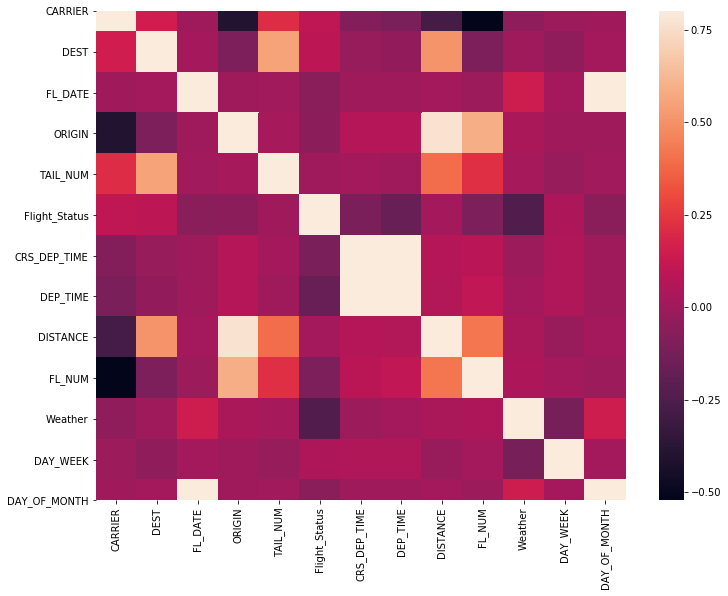

In [4]:
#correlation matrix
corrmat = flights_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

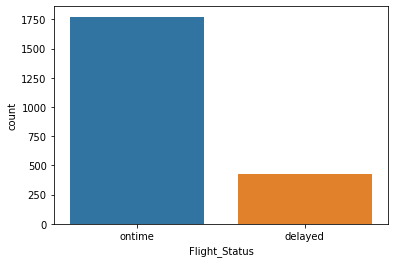

In [5]:
#total no. of delayed and ontime flights

sns.countplot(x="Flight_Status", data=flights_data)
plt.show()


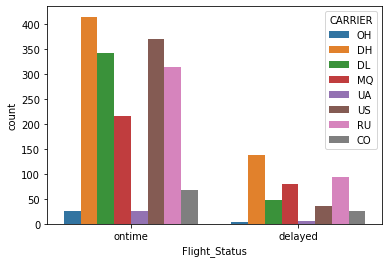

In [6]:
#no. of delayed and ontime flights depending on carrier

sns.countplot(x="Flight_Status", hue="CARRIER",data=flights_data)
plt.show()

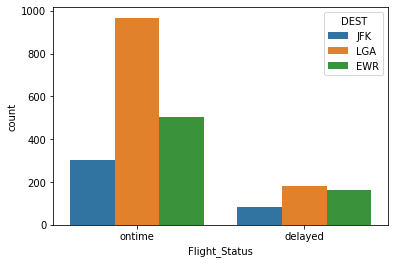

In [7]:
#no. of delayed and ontime flights depending on destination

sns.countplot(x="Flight_Status", hue="DEST",data=flights_data)
plt.show()

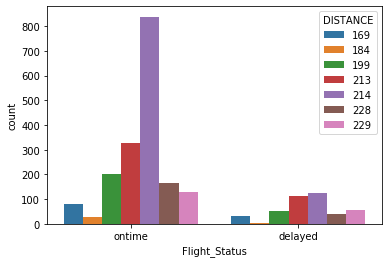

In [8]:
#no. of delayed and ontime flights depending on distance

sns.countplot(x="Flight_Status", hue="DISTANCE",data=flights_data)
plt.show()

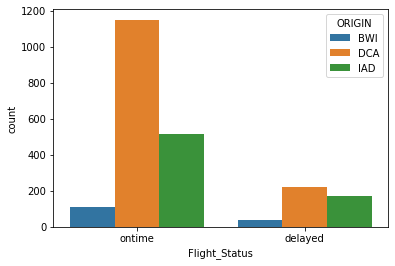

In [9]:
#no. of delayed and ontime flights depending on origin

sns.countplot(x="Flight_Status", hue="ORIGIN",data=flights_data)
plt.show()

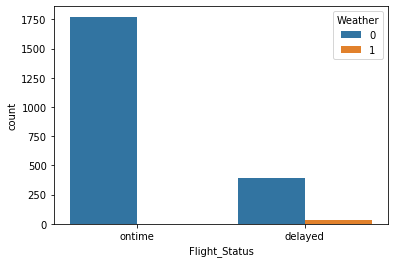

In [10]:
#no. of delayed and ontime flights depending on weather

sns.countplot(x="Flight_Status", hue="Weather",data=flights_data)
plt.show()

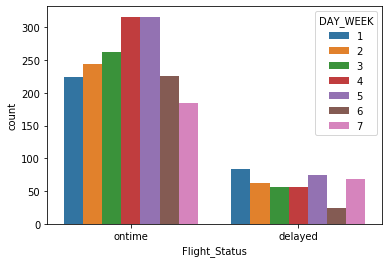

In [11]:
#no. of delayed and ontime flights depending on day of the week

sns.countplot(x="Flight_Status", hue="DAY_WEEK",data=flights_data)
plt.show()

In [12]:
#find no of delayed flights

Delayedflights = flights_data[(flights_data["Flight_Status"] == "delayed")]
Delayedflights.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
53,1455,DH,1531,LGA,229,01-02-2004,7211,IAD,0,5,2,N665BR,delayed
56,1039,DH,1236,LGA,229,01-02-2004,7792,IAD,0,5,2,N665BR,delayed
62,2120,DH,2305,JFK,228,01-02-2004,7814,IAD,0,5,2,N657BR,delayed
96,1245,DH,1350,EWR,213,01-02-2004,7303,IAD,0,5,2,N686BR,delayed
97,1430,DH,1512,EWR,213,01-02-2004,7307,IAD,0,5,2,N309UE,delayed


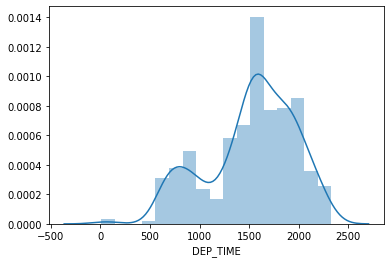

In [13]:
#histogram to find no of delayed flights due to departure time
sns.distplot(Delayedflights['DEP_TIME'])
plt.show()

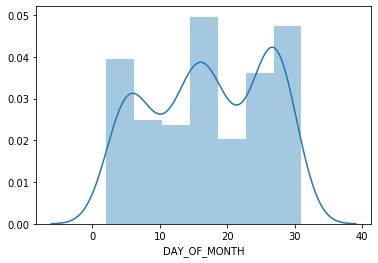

In [14]:
#histogram to find no of delayed flights due to day of the month
sns.distplot(Delayedflights['DAY_OF_MONTH'])
plt.show()

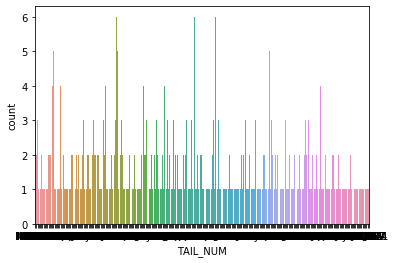

In [15]:
#no. of times a tail number flight is delayed

sns.countplot(x="TAIL_NUM",data=Delayedflights)
plt.show()

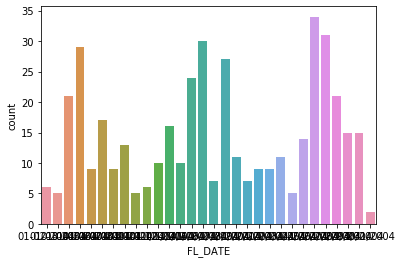

In [16]:
#no. of delayed flights on a particular date

sns.countplot(x="FL_DATE",data=Delayedflights)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


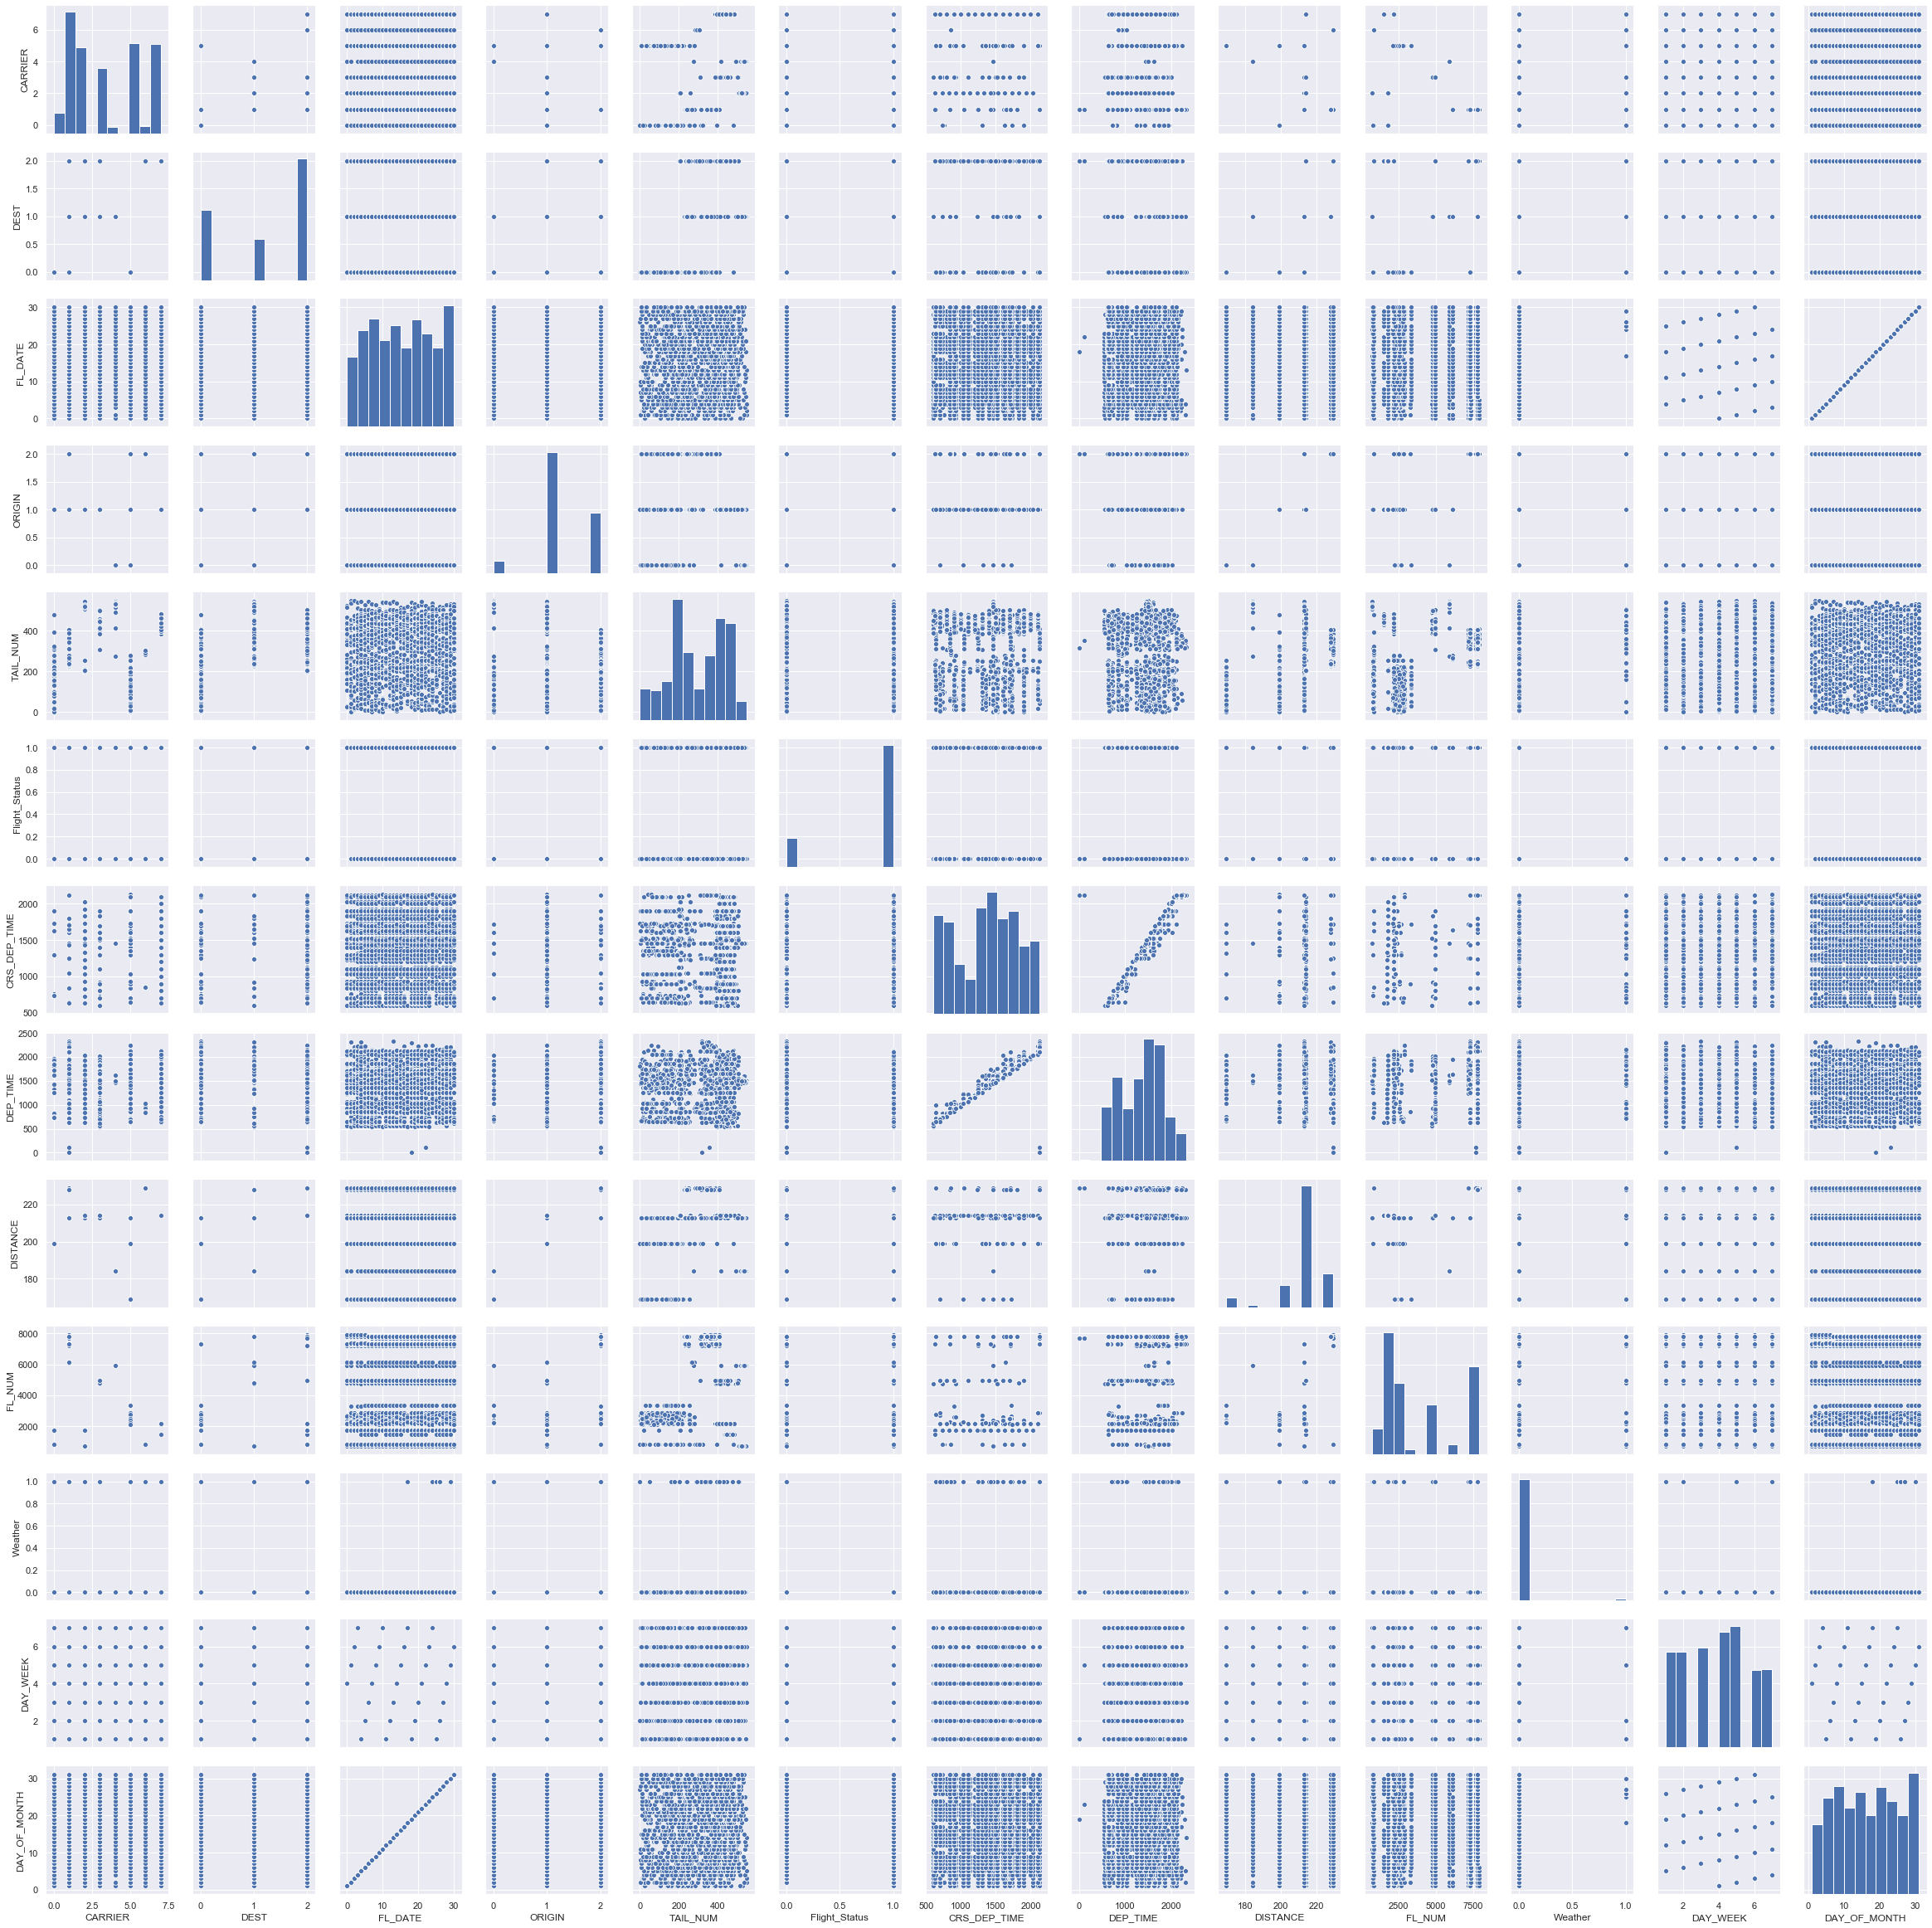

In [17]:
#scatterplot to get relation amongst all the variables
sns.set()
sns.pairplot(flights_df, size = 2.5)
plt.show()
